In [1]:
from aux_train import *
from aux_plot import *
import API_Numpy
import API_TensorFlow

float_pres = 'float64' # Definindo a precisão padrão para as análises

In [2]:

# Shock density wave Titarev–Toro
#-------------------------------------------------------------------
# t_final  = 5
# n        = 1000
# xlim     = (-5, 5)
# ylim     = (0.8, 1.8)
# fator    = 8
# n_ref    = n*fator

# BoundaryCondition = FronteiraFixa
#-------------------------------------------------------------------

# Shock density wave Shu–Osher
#-------------------------------------------------------------------
# t_final  = 1.8
# n        = 200
# xlim     = (-5, 5)
# ylim     = (0.5, 5)
# fator    = 40
# n_ref    = n*fator

# BoundaryCondition = FronteiraFixa
#-------------------------------------------------------------------

# Blast wave
#-------------------------------------------------------------------
t_final  = 0.038
n        = 400
xlim     = (0, 1)
ylim     = (0, 6)
fator    = 8
n_ref    = n*fator

BoundaryCondition = FronteiraReflexiva
#-------------------------------------------------------------------

Δx  = (xlim[1]-xlim[0])/n
CFL = 0.5
γ   = 1.4    

# Shock density wave Titarev–Toro
#-------------------------------------------------------------------
# def f_test(x):
    
#     k = 20
#     ρ = np.where(x < -4.5, 1.515695, 1+np.sin(k*np.pi*x)/10)
#     u = np.where(x < -4.5, 0.523346, 0)
#     p = np.where(x < -4.5, 1.805000, 1)
#     E = p/(γ-1)+ρ*(u**2)/2
    
#     Q = np.stack([ρ,ρ*u,E], axis=0)
    
#     return Q
#-------------------------------------------------------------------

# Shock density wave Shu–Osher
#-------------------------------------------------------------------
# def f_test(x):
    
#     k = 5
#     ρ = np.where(x < -4, 3.857143, 1+0.2*np.sin(k*x))
#     u = np.where(x < -4, 2.629369, 0)
#     p = np.where(x < -4, 31/3    , 1)
#     E = p/(γ-1)+ρ*(u**2)/2
    
#     Q = np.stack([ρ,ρ*u,E], axis=0)
    
#     return Q
#-------------------------------------------------------------------

# Blast wave
#-------------------------------------------------------------------
def f_test(x):
    
    ρ = x-x+1
    u = x-x
    p = np.where(  x < 0.1, 1000, 0.01)
    p = np.where(0.9 <   x,  100,    p)
    E = p/(γ-1)+ρ*(u**2)/2
    
    Q = np.stack([ρ,ρ*u,E], axis=0)
    
    return Q
#-------------------------------------------------------------------

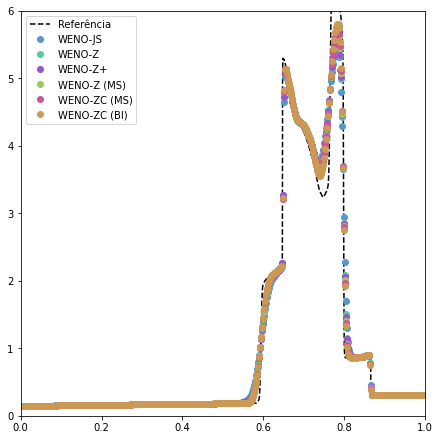

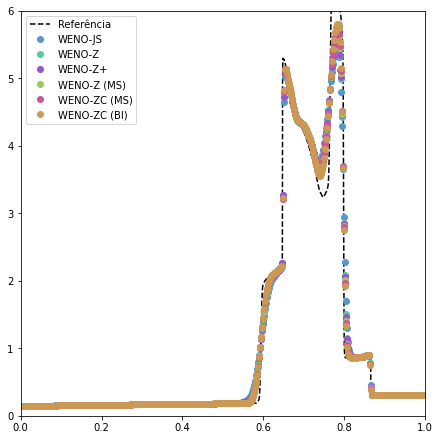

In [3]:
equation = euler_equation

Sim_JS    = simulation(API_Numpy, equation, WENO_JS, mapping =    null_mapping, map_function =   lambda x:x)
Sim_Z     = simulation(API_Numpy, equation, WENO_Z , mapping =    null_mapping, map_function =   lambda x:x)
Sim_Zp    = simulation(API_Numpy, equation, WENO_Zp, mapping =    null_mapping, map_function =   lambda x:x)
Sim_Z_MS  = simulation(API_Numpy, equation, WENO_Z , mapping =     pre_mapping, map_function = Hong_mapping)
Sim_ZC_MS = simulation(API_Numpy, equation, WENO_ZC, mapping = pre_inv_mapping, map_function = Hong_mapping)
Sim_ZC_BI = simulation(API_Numpy, equation, WENO_ZC, mapping = pre_inv_mapping, map_function =   BI_mapping)

# def f_exata(u, t_final, Δx, CFL, fronteira):
#     n=np.squeeze(t_final/Δx)
#     n_bottom=n//1
#     p=n%1
#     n_val=np.random.binomial(1,p)
#     n=int(n_bottom+n_val)
#     n_max=u.shape[-1]
#     n=n%n_max
#     if n>0:
#         u=fronteira(u,API_Numpy,n)[...,:-2*n] 
#     return u

evolve_plot = compara_evolve(
    WENOs     = [Sim_Z.Sim, Sim_JS.Sim, Sim_Z.Sim, Sim_Zp.Sim, Sim_Z_MS.Sim, Sim_ZC_MS.Sim, Sim_ZC_BI.Sim],
    Δx        = Δx,
    malha     = [fator, 1, 1, 1, 1, 1, 1],
    names     = ['Referência', 'WENO-JS', 'WENO-Z', 'WENO-Z+', 'WENO-Z (MS)', 'WENO-ZC (MS)', 'WENO-ZC (BI)'],
    use_cache = [True, True, True, True, True, True, True],
    replace   = False,
    f_test    = f_test,
    fronteira = BoundaryCondition,
    x_range   = xlim,
    xlim      = xlim,
    ylim      = ylim,
    colors    = ['black', '#5599cc', '#55cc99', '#9955cc', '#99cc55', '#cc5599', '#cc9955'],
    shapes    = ['--', 'o', 'o', 'o', 'o', 'o', 'o'],
    print_f   = lambda x:x[...,0,:]
)

evolve_plot.gif_framework(int(40), t_final/40, 'Testes/Blast Wave')

In [3]:
equation=burgers_equation
Sim_Z=simulation(API_Numpy,equation,WENO_Z)
Sim_JS=simulation(API_Numpy,equation,WENO_JS)
#Sim_DS=load_model('Modelos treinados/Modelo Rede temporal conv3 - 1',equation=equation,WENO_method=WENO_Z)
Sim_DS=Sim_Z

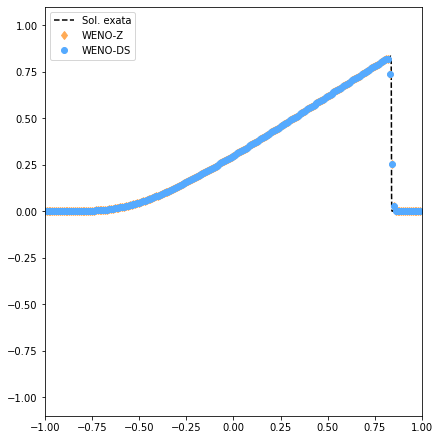

In [4]:
evolve_plot1=compara_evolve(WENOs=[Sim_Z.Sim,Sim_Z.Sim,Sim_DS.Sim],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot1.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2')

In [ ]:
evolve_plot2=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(0.4,0.6),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot2.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2')

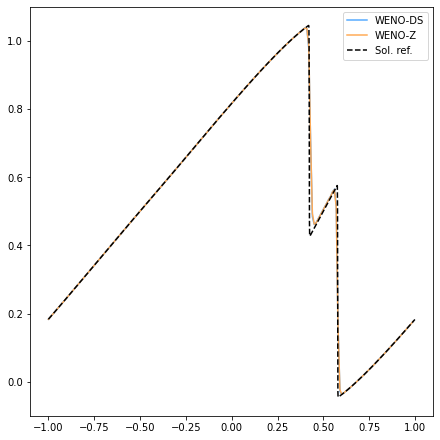

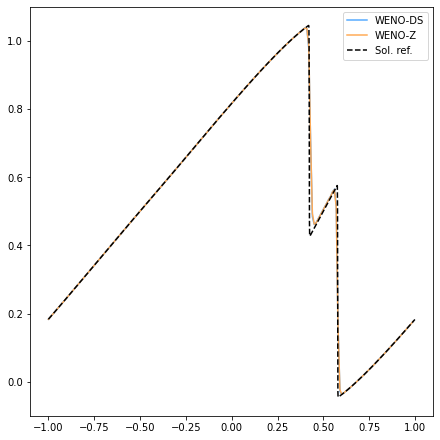

In [ ]:
evolve_plot3=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_1,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot3.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 1')

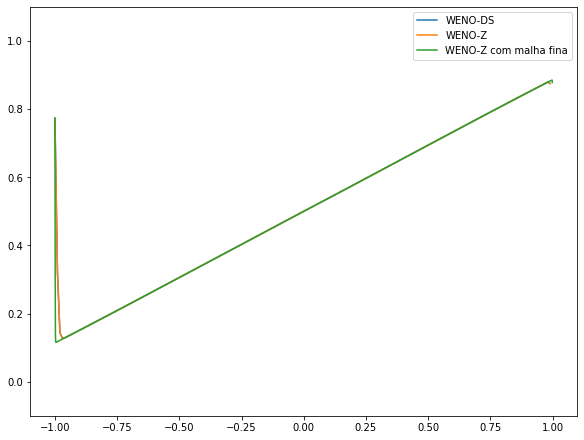

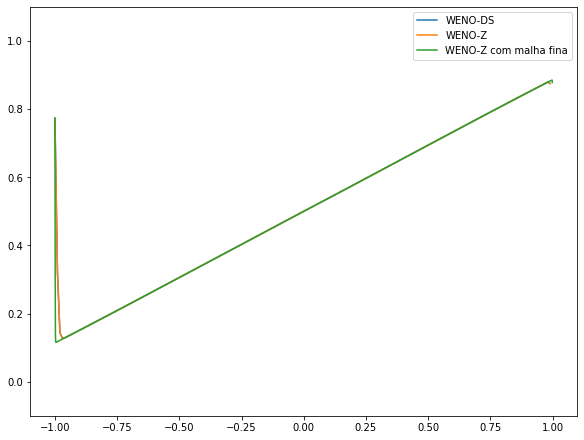

In [ ]:
evolve_plot4=compara_evolve(WENOs=[Sim_Z.Sim_step,Sim_Z.Sim_step,Sim_DS.Sim_step],
                           Δx=0.01,
                           malha=[10,1,1],
                           names=['Sol. exata','WENO-Z','WENO-DS'],
                           f_test=f_test_2,
                           fronteira=FronteiraPeriodica,
                           xlim=(-1,1),
                           ylim=(-0.1, 1.1),
                           colors=['black','#ffaa55', '#55aaff'],
                           shapes=['--','d','o'])

evolve_plot4.gif_framework(int(2/0.01),0.01,'imagens/burgers-ds 2 satur')